# Numerical Studies of Quantum Entanglement

In this notebook, we will perform some numerical studies of multiple-particle quantum mechanics. It is assumed that you are familiar with the basics of using Python 1D arrays to represent vectors, and 2D arrays to represent matrices/operators. For a detailed discussion of some of the topics covered below, you may optionally refer to Appendix D (Numerical Tensor Products) in the course notes, but that is not necessary to complete this notebook.

## Numerical tensor products

Tensor products are implemented using the [`kron`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.kron.html) function from the `numpy` module.

### 1. Tensor products of vectors

Consider vectors $|a\rangle \in \mathscr{H}_A$ and $|b\rangle \in \mathscr{H}_B$, represented by 1D arrays `a` and `b`. Their tensor product is computed as follows:

> $|a\rangle \otimes |b\rangle \quad \leftrightarrow\quad$ `kron(a, b)`

The result is a 1D array of length $\mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B) = \mathrm{dim}(\mathscr{H}_A) \mathrm{dim}(\mathscr{H}_B)$. Note that $\mathscr{H}_A$ and $\mathscr{H}_B$ need not have the same dimensionality.

Here is an example:

In [1]:
import numpy as np

a   = np.array([2., -1.])     # vector in a 2D space
b   = np.array([1., 2., 3.])  # vector in a 3D space
psi = np.kron(a, b)           # vector in the 6D tensor product space

print(psi)

[ 2.  4.  6. -1. -2. -3.]


We can verify the above example in bra-ket notation.  Let $\{|m\rangle, |n\rangle\}$ be the basis for space $\mathscr{H}_A$, and let $\{|p\rangle, |q\rangle, |r\rangle\}$ be the basis for space $\mathscr{H}_B$:

$$\begin{aligned}|a\rangle &= 2|m\rangle - |n\rangle \\ |b\rangle &= 1|p\rangle + 2|q\rangle + 3|r\rangle \\  \Rightarrow \;\; |a\rangle \otimes |b \rangle &= 2|m\rangle |p\rangle + 4|m\rangle |q\rangle + 6|m\rangle |r\rangle - |n\rangle |p\rangle -2 |n\rangle |q\rangle - 3|n\rangle |r\rangle \end{aligned}$$

Note that the basis vectors are in a specific order, and `kron(a,b)` is NOT generally the same as `kron(b,a)`:

In [2]:
foo = np.kron(b, a)  # This doesn't give the same result as kron(a, b)
print(foo)

[ 2. -1.  4. -2.  6. -3.]


### 2. Tensor products of arrays

Consider operators $\hat{O}_A$ and $\hat{O}_B$, whose matrix components are given by 2D arrays `OA` and `OB`. Their tensor product is computed as follows:

> $\hat{O}_A \otimes \hat{O}_B \quad\leftrightarrow\quad$ `kron(OA, OB)`.

This is a 2D array of size $\mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B) \, \times \, \mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B)$.

Here is an example to verify that

$$\Big(\hat{O}_A \otimes \hat{O}_B \Big) \Big(|\psi_A\rangle \otimes |\psi_B\rangle\Big) = \Big(\hat{O}_A |\psi_A\rangle\Big) \otimes \Big(\hat{O}_B |\psi_B\rangle\Big) $$

In [7]:
## Define new example vectors a and b, this time as complex arrays...
a  = np.array([2.+1j, 1j],     dtype=complex)
b  = np.array([-1j, 2., 1-1j], dtype=complex)

## Define two example operators (2D arrays), OA and OB:
OA = np.array([[2., 1.], [1j, 1.]], dtype=complex)
OB = np.array([[1., 2j, 3.], [0., 4., 0.], [1., 0., 1j]], dtype=complex)

O_total = np.kron(OA, OB)                     # Tensor product of OA and OB

OAa = np.dot(OA, a)                           # OA * a is a vector (1D array)
OBb = np.dot(OB, b)                           # OB * b is a vector (1D array)

print("LHS: ",  np.dot(O_total, np.kron(a, b)))  # LHS
print("RHS: ",  np.kron(OAa, OBb))               # RHS

LHS:  [12. +9.j 32.+24.j  4. +3.j -3. +9.j -8.+24.j -1. +3.j]
RHS:  [12. +9.j 32.+24.j  4. +3.j -3. +9.j -8.+24.j -1. +3.j]


## Task 1: Calculate measurement probabilities (6 marks)

As before, let Hilbert space $\mathscr{H}_A$ be spanned by $\{|m\rangle, |n\rangle\}$, and let Hilbert space $\mathscr{H}_B$ be spanned by $\{|p\rangle, |q\rangle, |r\rangle\}$. Consider the state

$$|\psi\rangle = \frac{1}{\sqrt{3}} |m\rangle |p\rangle + \frac{1}{3} |n\rangle |q\rangle + \frac{\sqrt{2}}{3} |m\rangle |q\rangle + \frac{1}{\sqrt{3}} |n\rangle |r\rangle.$$

Write code to compute the following measurement probabilities:

* Probability of obtaining result $m$ by doing a measurement on $A$
* Probability of obtaining result $n$ by doing a measurement on $A$
* Probability of obtaining result $p$ by doing a measurement on $B$
* Probability of obtaining result $q$ by doing a measurement on $B$
* Probability of obtaining result $r$ by doing a measurement on $B$

Your code should make use of projection operators; don't just solve the problem analytically and write the answers into the program. Some additional hints are given below.

In [11]:
## Define the |m>, |n>, |p>, |q>, and |r> vectors as 1D arrays.
m = np.array([1., 0.], dtype=complex)
n = np.array([0., 1.], dtype=complex)
p = np.array([1., 0., 0.], dtype=complex)
q = np.array([0., 1., 0.], dtype=complex)
r = np.array([0., 0., 1.], dtype=complex)

## Insert the rest of the code here...


### Hints for Task 1

<ul><li>
To calculate (say) the probability of obtaining a result $m$ on $A$, construct the operator
$$\hat{\Pi}_m = \Big(|m\rangle\langle m|\Big)\otimes \hat{I}_B $$
where $\hat{I}_B$ is the identity operator for $\mathscr{H}_B$. Then compute
$$| \psi'\rangle = \hat{\Pi}_m |\psi\rangle.$$
The desired probability is $P_m = \langle \psi' | \psi'\rangle.$</li>
</ul>

* To compute a matrix-vector product $\hat{Q} |v\rangle$, use the [`np.dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function: `dot(Q, v)`.

* To compute an inner product $\langle u|v\rangle$, use the [`np.dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function: `dot(u.conj(), v)`.  Note the complex conjugate on the bra (the first input).

* To compute an outer product $|u\rangle\langle v|$, use the [`np.outer`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) function: `outer(u, v.conj())`. Note the complex conjugate on the bra (the second input).

* To generate an identity matrix, use the [`np.eye`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) function: e.g., `eye(2)` or `eye(3)`.

## Partial projections

Computing density matrices requires performing partial projections. There are two cases to worry about.

### 1. Left projections

A partial projection acting from the left can be implemented via the recipe

> $\quad \langle \alpha | \otimes \hat{O}_B \quad \leftrightarrow \quad$ `kron(alpha.conj(), OB)`

> $\quad \hat{O}_A \otimes \langle \beta| \quad\leftrightarrow \quad$ `kron(OA, beta.conj())`

The following example verifies that

$$\begin{aligned}\Big(\langle \alpha | \otimes \hat{O}_B\Big) \Big(|a\rangle |b\rangle\Big) &= \langle \alpha | a\rangle \Big(\hat{O}_B |b\rangle\Big) \;\;\in\;\;\mathscr{H}_B, \\ \Big(\hat{O}_A \otimes \langle \beta |\Big) \Big(|a\rangle |b\rangle\Big) &= \langle \beta | b\rangle \Big(\hat{O}_A |a\rangle\Big) \;\;\in\;\;\mathscr{H}_A.\end{aligned}$$


In [22]:
## Note: a, b, OA, and OB were defined in a previous code cell.

alpha     = np.array([2+1j, 1-2j], dtype=complex)
projector = np.kron(alpha.conj(), OB)
print("LHS1: ",  np.dot(projector, np.kron(a, b)))          # LHS of the first equation above
print("RHS1: ",  np.dot(alpha.conj(), a) * np.dot(OB, b))   # RHS of the first equation
print("Shape of the <alpha| x O_B matrix is", projector.shape)

beta      = np.array([2+1j, 1-2j, -1-1j], dtype=complex)
projector = np.kron(OA, beta.conj())
print("LHS2: ",  np.dot(projector, np.kron(a, b)))         # LHS of the second equation
print("RHS2: ",  np.dot(beta.conj(), b) * np.dot(OA, a))   # RHS of the second equation
print("Shape of the O_A x <beta| matrix is", projector.shape)

LHS1:  [ 9.+3.j 24.+8.j  3.+1.j]
RHS1:  [ 9.+3.j 24.+8.j  3.+1.j]
Shape of the <alpha| x O_B matrix is (3, 6)
LHS2:  [ -8.+19.j -13. -1.j]
RHS2:  [ -8.+19.j -13. -1.j]
Shape of the O_A x <beta| matrix is (2, 6)


### 2. Right projections

Partial projections acting from the right are a bit trickier. We won't go into details, but here are the recipes:

> $\quad |\alpha\rangle \otimes \hat{O}_B \quad \leftrightarrow \quad$ `kron(alpha, OB.T).T`

> $\quad \hat{O}_A \otimes |\beta\rangle \quad \leftrightarrow \quad$ `kron(OA.T, beta).T`

The following example verifies that

$$\begin{aligned}\Big(\langle a|\langle b|\Big) \Big(|\alpha\rangle \otimes \hat{O}_B\Big) &= \langle a|\alpha\rangle \, \Big(\langle b|\hat{O}_B \Big) \\ \Big(\langle a|\langle b|\Big) \Big(\hat{O}_A \otimes |\beta\rangle\Big) &= \langle b|\beta\rangle\, \Big(\langle a|\hat{O}_A\Big)\end{aligned}$$

In [25]:
## Note: a, b, alpha, beta, and OB were defined previously.

projector1 = np.kron(alpha, OB.T).T
print("LHS1: ",  np.dot(np.kron(a,b).conj(), projector1))
print("RHS1: ",  np.dot(a.conj(), alpha) * np.dot(b.conj(), OB))

projector2 = np.kron(OA.T, beta).T
print("LHS2: ",  np.dot(np.kron(a,b).conj(), projector2))
print("RHS2: ",  np.dot(b.conj(), beta) * np.dot(a.conj(), OA))

LHS1:  [ 5. +5.j 18. -6.j  1.+13.j]
RHS1:  [ 5. +5.j 18. -6.j  1.+13.j]
LHS2:  [-3.-22.j -6.-10.j]
RHS2:  [-3.-22.j -6.-10.j]


# Task 2: Calculating reduced density matrices (6 marks)

Using the above projection rules, write a Python function that takes a density matrix $\hat{\rho}$ (acting on some space $\mathscr{H}_A \otimes \mathscr{H}_B$), and returns the reduced density matrix $\hat{\rho}_A$.  The reduced density matrix is defined as

$$\begin{aligned}\hat{\rho}_A &= \mathrm{Tr}_B \big[\, \hat{\rho}\, \big] \\ &= \sum_{b} \Big(\hat{I}_A \otimes \langle b|\Big) \; \hat{\rho} \;\Big(\hat{I}_A \otimes | b\rangle\Big)\end{aligned}$$

where $\hat{I}_A$ denotes the identity operator in $\mathscr{H}_A$ and $\sum_b$ denotes a sum over basis vectors $\{|b\rangle\}$ spanning $\mathscr{H}_B$.

Note: **don't worry about optimizing the code for performance; focus on correctness**.

In [27]:
## Function returning a reduced density matrix, traced over the B subspace.
## The parameter dimA specifies the dimensionality of the A subspace.
def reduced_density_matrix_A(rho, dimA):
    assert rho.shape[0] == rho.shape[1]    # rho must be a square matrix
    dimB = rho.shape[0] // dimA            # determine dim(H_B)

    ## Insert the rest of the code here...
    return np.eye(dimA) # FIXME

### Hints for Task 2

To check whether you have written the function correctly, there are a couple of things you can do:

* Check that if you supply a pure state density matrix as the input `rho`, the return value has all the necessary properties of a density matrix: e.g., it must be Hermitian, and all the eigenvalues are real numbers between 0 and 1, summing to 1.
* Run the following code snippet to verify that the state
$$|\psi\rangle = \frac{1}{\sqrt{2}} \Big(|\!+\!z\rangle\, |\!-\!z\rangle \,-\, |\!-\!z\rangle\,|\!+\!z\rangle\Big)$$
has the maximum possible entropy $k_B \log(2)$, as discussed in class:

In [32]:
up   = np.array([1.0, 0.0])
down = np.array([0.0, 1.0])

psi = 1/np.sqrt(2) * (np.kron(up, down) - np.kron(down, up))
rho = np.outer(psi, psi.conj())
rhoA = reduced_density_matrix_A(rho, 2)

from scipy.linalg import logm            # The matrix logarithm function
S = - np.trace(np.dot(rhoA, logm(rhoA))).real

print("S = ", S)
print("Expected entropy = ", np.log(2))

S =  -0.0
Expected entropy =  0.6931471805599453


# Task 3: Evolution of the entropy (8 marks)

Consider a 2D Hilbert space $\mathscr{H}_A$ coupled to an $N$-dimensional Hilbert space $\mathscr{H}_B$, with initial state

$$|\psi(t=0)\rangle = \frac{1}{\sqrt{2}}\Big(|\!+\!z\rangle + |\!-\!z\rangle\Big) \otimes |\psi_B\rangle,$$

where $|\psi_B\rangle \in \mathscr{H}_B$ is a *randomly chosen* vector with unit norm. Let the combined system evolve under the Hamiltonian

$$\hat{H} = \hat{\sigma}_z \otimes \hat{V},$$

where $\hat{\sigma}_z$ is a Pauli matrix and $\hat{V}$ is a *randomly chosen* Hermitian operator.  A convenient way to generate $\hat{V}$ is to take

$$  \begin{aligned}A_{ij} &\sim u_{ij} + i v_{ij}, \;\;\;\mathrm{where}\;\;u_{ij},v_{ij}\sim N(0,1)\\ \hat{V} &= \frac{1}{2\sqrt{d}} \left(\hat{A} + \hat{A}^\dagger\right).\end{aligned}$$

with $N(0,1)$ representing the standard normal distribution.

Compute the entanglement entropy as a function of time. Compare two cases: (i) $d$ on the order of unity, and (ii) $d \gg 1$.

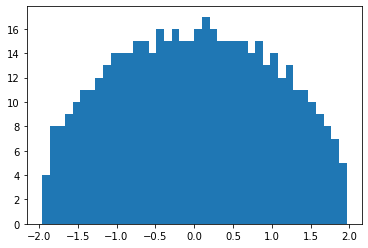

In [41]:
## Here's some starter code that draws a random V matrix and plots a histogram
## of its eigenvalues. Replace this code with what you actually want to do...

import matplotlib.pyplot as plt

d = 500
A = np.random.randn(d,d) + 1j*np.random.randn(d,d)
V = 1/2/np.sqrt(d) * (A + A.T.conj())

from scipy.linalg import eigvalsh  # Eigenvalue solver for Hermitian matrices
E = eigvalsh(V)
plt.hist(E, bins=40)
plt.show() # The eigenvalues follow the Wigner-Dyson distribution, falling between [-2,2].